In [1]:
import pandas as pd 
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df5 = pd.read_csv("df5.csv",
                 parse_dates = ['DATE'], index_col=['DATE'])
df5

,CANCELLATION
DATE,
2020-01-01,145
2020-01-02,112
2020-01-03,141
2020-01-04,150
2020-01-05,100
...,...
2020-06-26,12
2020-06-27,26
2020-06-28,23


## ARIMA (Autoregressive Integrated Moving Average)

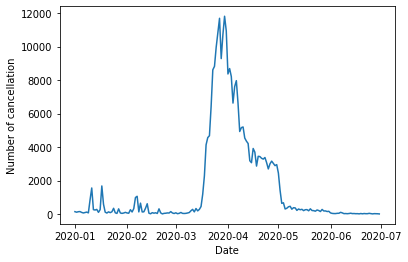

In [4]:
plt.xlabel('Date')
plt.ylabel('Number of cancellation')
plt.plot(df5)

### Original time series

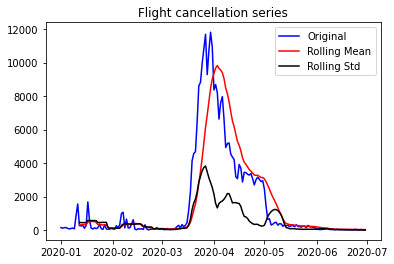

In [5]:
rolling_mean = df5.rolling(window = 12).mean()
rolling_std = df5.rolling(window = 12).std()
plt.plot(df5, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Flight cancellation series')
plt.show()

#plt.savefig('fig3', dpi=200)

In [5]:
result = adfuller(df5['CANCELLATION'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.6892853647413846
p-value: 0.4366412626740192
Critical Values:
	1%: -3.4691814633722453
	5%: -2.878595143532943
	10%: -2.5758625549741803


### Differencing (1)


In [6]:
# Differencing function
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #plt.savefig('fig6', dpi=200)

    # Dickey–Fuller test:
    result = adfuller(timeseries['CANCELLATION'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

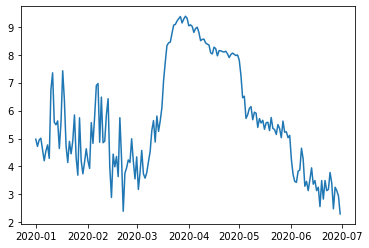

In [6]:
# taking log
df_log = np.log(df5)
plt.plot(df_log)

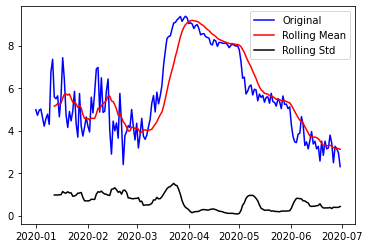

In [7]:
# log
rolling_mean = df_log.rolling(window = 12).mean()
rolling_std = df_log.rolling(window = 12).std()
plt.plot(df_log, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
#plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

### Differencing (2)

ADF Statistic: -3.324573461250481
p-value: 0.013815142099684371
Critical Values:
	1%: -3.471118535474365
	5%: -2.8794405060097024
	10%: -2.576313761526591


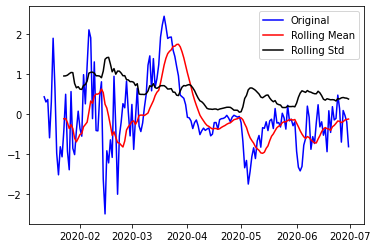

In [15]:
# rolloing mean substration 
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

### Differencing (3)

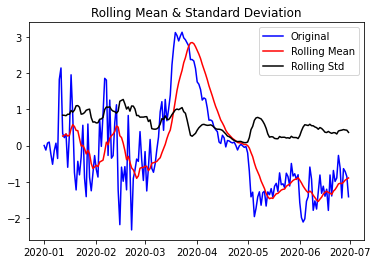

ADF Statistic: -2.0075314612503146
p-value: 0.28328061105351576
Critical Values:
	1%: -3.4685016947910636
	5%: -2.8782983668563396
	10%: -2.57570415906989


In [10]:
# exponential decay
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

### Differencing (4)

ADF Statistic: -4.135477375825245
p-value: 0.0008457000926549321
Critical Values:
	1%: -3.4685016947910636
	5%: -2.8782983668563396
	10%: -2.57570415906989


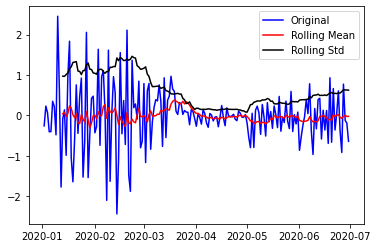

In [17]:
# time shifting
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

### Tuning parameters

In [12]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(df_log_shift,trace=True, error_action='ignore', 
                        start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(df_log_shift)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=397.753, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=380.216, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=376.710, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=375.469, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=389.954, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=379.643, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=376.745, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=375.029, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=371.771, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=373.769, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=359.088, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=373.768, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=375.765, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=377.681, Time=0.14 sec

Best model:  ARIMA(2,0,2)(0,

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\mindt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\mindt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\mindt\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mindt\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\mindt\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\U

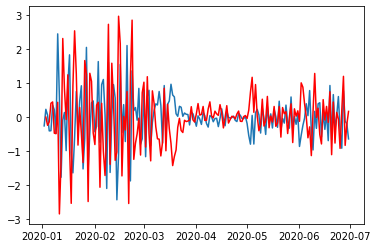

In [13]:
decomposition = seasonal_decompose(df_log_shift) 
model = ARIMA(df_log_shift, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

### Result

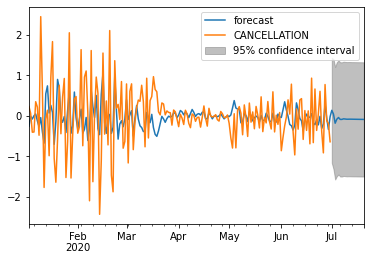

In [27]:
results.plot_predict(1,200)
plt.savefig('fig7', dpi=200)